# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych

Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_HP` - jednorodny rozkład Poissona,
 - `points_UP` - niejednorodny rozkład Poissona,
 - `points_M` - rozkład Materna,
 - `points_T` - rozkład Thomasa,
 
wygenerowane dla zakresu współrzędnych X $[-10, 10]$ i Y $[-5, 5]$.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [3]:
# Wczytanie danych
points_HP = pd.read_pickle('points_HP.pkl')
points_UP = pd.read_pickle('points_UP.pkl')
points_M = pd.read_pickle('points_M.pkl')
points_T = pd.read_pickle('points_T.pkl')

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (15 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Algorytm postępowania:
1. Dzielimy analizowany obszar na identyczne prostokątne podobszary ułożone w równomiernej siatce (w wierszach i kolumnach).
2. Zliczamy punkty znajdujące się w poszczególych podobszarach (punkty znajdujące się na granicach podobszarów powinny być zliczone tylko do jednego z nich).
3. Obliczamy intensywność procesu w obrębie poszczególnych podobszarów dzieląc znajdującą się w nich liczbę punktów przez pole powierzchni podobszaru.

Uwagi do wykonania zadania:
- W części zadania dotyczącej funkcji obliczającej intensywność procesu nie należy dublować kodu napisanego w funkcji zliczającej punkty w obrębie prostokątnych podobszarów, a jedynie wywołać przygotowaną wcześniej funkcję `point_count_on_subregions()`.
- W metodzie szacowania lokalnego szacowanie intensywności odbywa się na kwadratowych podobszarach. W celu ułatwienia pisania funkcji warunek ten w zadaniu został rozluźniony do obszarów prostokątnych. We wszystkich zadaniach rozmiar obszaru i parametry siatki podobszarów są natomiast dobrane w taki sposób, że wygenerowane podobszary będą kwadratami.

#### a) Przygotowanie funkcji

In [4]:
def point_count_on_subregions(points, bins, x_lim, y_lim):

    X = np.linspace(x_lim[0],x_lim[-1],bins[0]+1)
    Y = np.linspace(y_lim[0],y_lim[-1],bins[-1]+1)
    number_of_points_in_subregions, X_coordinates_of_subregions, Y_coordinates_of_subregions = np.histogram2d(points["X"],points["Y"],bins=(X,Y))
    #zwraca transponowane T bo wspolrzedne są inaczej 
    return [number_of_points_in_subregions.T,X_coordinates_of_subregions,Y_coordinates_of_subregions]

def intensity_on_subregions(points, bins, x_lim, y_lim):
    number_of_points_in_subregions, X_coordinates_of_subregions, Y_coordinates_of_subregions = point_count_on_subregions(points, bins, x_lim, y_lim)
    area = (X_coordinates_of_subregions[1]-X_coordinates_of_subregions[0])*(Y_coordinates_of_subregions[1]-Y_coordinates_of_subregions[0])
    intensity=number_of_points_in_subregions/area
    return [intensity,X_coordinates_of_subregions,Y_coordinates_of_subregions]

In [5]:
# Komórka testowa
test_intensity_1 = intensity_on_subregions(points_HP, bins=[10, 5], x_lim=[-5, 5], y_lim=[-2.5, 2.5])
assert type(test_intensity_1) == list
assert len(test_intensity_1) == 3
assert np.shape(test_intensity_1[0]) == (5, 10)
assert np.all(np.isclose(np.sum(test_intensity_1[0], axis=0), np.array([47., 38., 56., 45., 54., 51., 46., 57., 50., 66.])))
assert np.all(np.isclose(np.sum(test_intensity_1[0], axis=1), np.array([98.,  96.,  96., 111., 109.])))
assert np.shape(test_intensity_1[1]) == (11,)
assert np.all(np.isclose(test_intensity_1[1], np.array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])))
assert np.shape(test_intensity_1[2]) == (6,)
assert np.all(np.isclose(test_intensity_1[2], np.array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])))

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj funkcje przygotowane w poprzednim podpunkcie zadania do zbadania intensywności wszystkich wczytanych do notatnika rozkładów punktowych. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $X$ i 20 podobszarów wzdłuż osi $Y$. Analizę przeprowadź dla całego obszaru, na którym zostały wygenerowane punkty.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).
Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości intensywności wyznaczonej dla kompletu analizowanych rozkładów.

<AxesSubplot: title={'center': 'Thomas'}, xlabel='X', ylabel='Y'>

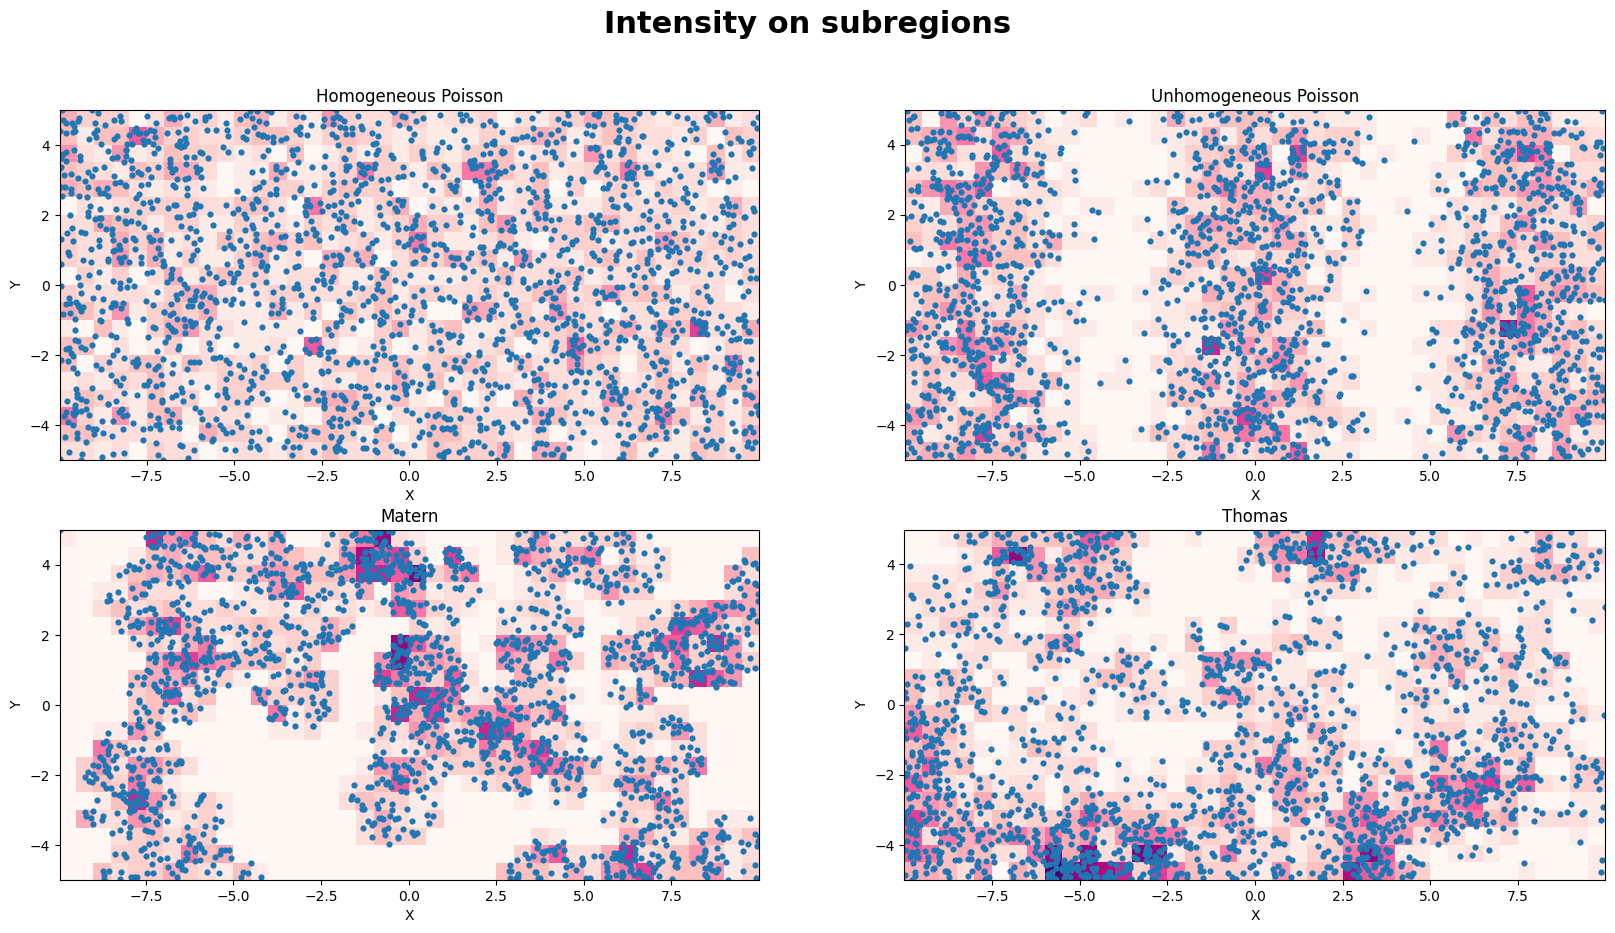

In [6]:
number_of_points_in_subregions1, X_coordinates_of_subregions1, Y_coordinates_of_subregions1 = point_count_on_subregions(points_HP, bins=[40, 20], x_lim=[-10, 10], y_lim=[-5, 5])
number_of_points_in_subregions2, X_coordinates_of_subregions2, Y_coordinates_of_subregions2 = point_count_on_subregions(points_UP, bins=[40, 20], x_lim=[-10, 10], y_lim=[-5, 5])
number_of_points_in_subregions3, X_coordinates_of_subregions3, Y_coordinates_of_subregions3 = point_count_on_subregions(points_M, bins=[40, 20], x_lim=[-10, 10], y_lim=[-5, 5])
number_of_points_in_subregions4, X_coordinates_of_subregions4, Y_coordinates_of_subregions4 = point_count_on_subregions(points_T, bins=[40, 20], x_lim=[-10, 10], y_lim=[-5, 5])

all_number_of_points_in_subregions = [number_of_points_in_subregions1, number_of_points_in_subregions2 ,number_of_points_in_subregions3, number_of_points_in_subregions4]
min_intensity = np.min(all_number_of_points_in_subregions)
max_intensity = np.max(all_number_of_points_in_subregions)

figure,axes = plt.subplots(2,2,figsize=(20,10))
figure.suptitle(t="Intensity on subregions", size = 22, weight = "bold")

axes[0,0].axis("square")
axes[0,0].set_title("Homogeneous Poisson")
axes[0,0].set_xlim(np.min(points_HP["X"]),np.max(points_HP["X"]))
axes[0,0].set_ylim(np.min(points_HP["Y"]),np.max(points_HP["Y"]))
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")
axes[0,0].pcolormesh(X_coordinates_of_subregions1, Y_coordinates_of_subregions1, number_of_points_in_subregions1, cmap="RdPu", vmin = min_intensity, vmax = max_intensity)
sns.scatterplot(data=points_HP, x="X", y="Y", ax=axes[0,0], s=20, linewidth=0)

axes[0,1].axis("square")
axes[0,1].set_title("Unhomogeneous Poisson")
axes[0,1].set_xlim(np.min(points_UP["X"]),np.max(points_UP["X"]))
axes[0,1].set_ylim(np.min(points_UP["Y"]),np.max(points_HP["Y"]))
axes[0,1].set_xlabel("X")
axes[0,1].set_ylabel("Y")
axes[0,1].pcolormesh(X_coordinates_of_subregions2, Y_coordinates_of_subregions2, number_of_points_in_subregions2, cmap="RdPu", vmin = min_intensity, vmax = max_intensity)
sns.scatterplot(data=points_UP, x="X", y="Y", ax=axes[0,1], s=20, linewidth=0)

axes[1,0].axis("square")
axes[1,0].set_title("Matern")
axes[1,0].set_xlim(np.min(points_M["X"]),np.max(points_M["X"]))
axes[1,0].set_ylim(np.min(points_M["Y"]),np.max(points_M["Y"]))
axes[1,0].set_xlabel("X")
axes[1,0].set_ylabel("Y")
axes[1,0].pcolormesh(X_coordinates_of_subregions3, Y_coordinates_of_subregions3, number_of_points_in_subregions3, cmap="RdPu", vmin = min_intensity, vmax = max_intensity)
sns.scatterplot(data=points_M, x="X", y="Y", ax=axes[1,0], s=20, linewidth=0)

axes[1,1].axis("square")
axes[1,1].set_title("Thomas")
axes[1,1].set_xlim(np.min(points_T["X"]),np.max(points_T["X"]))
axes[1,1].set_ylim(np.min(points_T["Y"]),np.max(points_T["Y"]))
axes[1,1].set_xlabel("X")
axes[1,1].set_ylabel("Y")
axes[1,1].pcolormesh(X_coordinates_of_subregions4, Y_coordinates_of_subregions4, number_of_points_in_subregions4, cmap="RdPu", vmin = min_intensity, vmax = max_intensity)
sns.scatterplot(data=points_T, x="X", y="Y", ax=axes[1,1], s=20, linewidth=0)


### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (20 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora intensywności.

Algorytm postępowania:
1) Generujemy punkty pomiarowe na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty leżą na granicach analizowanego obszaru.
2) Dla każdego z wygenerowanych punktów pomiarowych szacujemy intensywność procesu za pomocą jądrowego estymatora intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2}(1-\frac{d_i^2}{\tau^2})^2$$ 
gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Uwagi do wykonania zadania:
- Podczas pisania funkcji należy wykorzystać maksymalnie jedną pętlę `for` iterującą po kolejnych pozycjach funkcji jądrowej. Nie należy korzystać z pętli `for` podczas wyliczania wartości funkcji jądrowej w poszczególnych jej lokalizacjach.
- Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związku z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [7]:
def intensity_on_kde( points, kernel_radius, grid, x_lim, y_lim ):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi punktów, dla których wyliczone zostały wartości intensywności
        opisane jako "X" i "Y" oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # siatka x i y
    x_points = np.linspace( x_lim[0], x_lim[1], grid[0] )
    y_points = np.linspace( y_lim[0], y_lim[1], grid[1] )
    x_m, y_m = np.meshgrid( x_points, y_points )
    x = x_m.flatten()
    y = y_m.flatten()
    
    # obliczenie intensywności
    intensity = np.zeros( len(x) )
    for i in range( len(x) ):
        dist = ( ( x[i] - np.array( points["X"] ) )**2 + ( y[i] - np.array( points["Y"] ) )**2 )**0.5
        dist = dist[dist < kernel_radius]
        intensity[i] = sum( 3/( np.pi*( kernel_radius**2 ) )*(1-(dist**2)/(kernel_radius**2))**2 )

    data = { "X" : x, "Y" : y, "I" : intensity }
    intensity_data = pd.DataFrame( data )
    return intensity_data

In [8]:
# Komórka testowa
test_intensity_2 = intensity_on_kde(points_HP, kernel_radius=1.25, grid=[50, 25], x_lim=[-5, 5], y_lim=[-2.5, 2.5])
assert type(test_intensity_2) == pd.DataFrame
assert test_intensity_2.shape == (1250, 3)
assert list(test_intensity_2.columns) == ["X", "Y", "I"]
assert np.isclose(np.min(test_intensity_2["X"]), -5)
assert np.isclose(np.max(test_intensity_2["X"]), 5)
assert np.isclose(np.min(test_intensity_2["Y"]), -2.5)
assert np.isclose(np.max(test_intensity_2["Y"]), 2.5)
assert np.isclose(np.min(test_intensity_2["I"]), 4.063039686796769)
assert np.isclose(np.max(test_intensity_2["I"]), 15.939182630365504)
assert np.isclose(np.mean(test_intensity_2["I"]), 10.041689189726556)

#### b) Wygenerowanie danych i wizualizacja
Wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich wczytanych do notatnika rozkładów punktowych. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki 200x100 punktów pomiarowych. Analizę przeprowadź dla całego obszaru, na którym zostały wygenerowane punkty.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2). Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości intensywności wyznaczonej dla kompletu analizowanych rozkładów.

Text(0.5, 0.98, 'Intensity on kde')

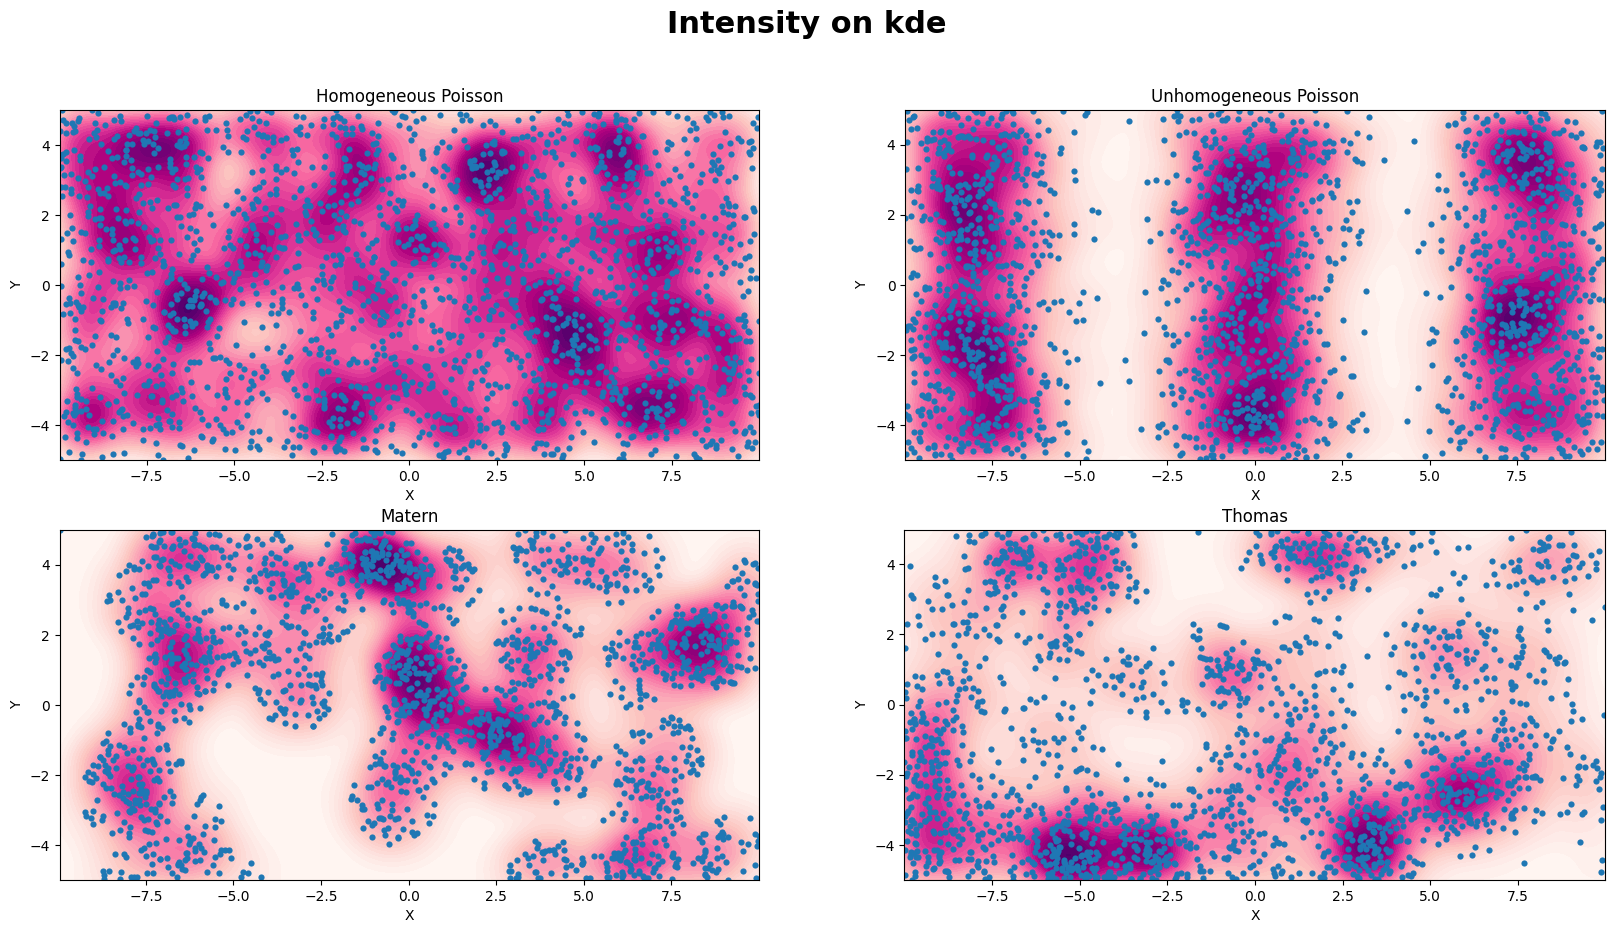

In [9]:
kernel_radius = 1.5
grid = [200,100]
intensity_HP = intensity_on_kde(points_HP, kernel_radius, grid, [np.min(points_HP["X"]),np.max(points_HP["X"])], [np.min(points_HP["Y"]),np.max(points_HP["Y"])])
intensity_UP = intensity_on_kde(points_UP, kernel_radius, grid, [np.min(points_UP["X"]),np.max(points_UP["X"])], [np.min(points_UP["Y"]),np.max(points_UP["Y"])])
intensity_M = intensity_on_kde(points_M, kernel_radius, grid, [np.min(points_M["X"]),np.max(points_M["X"])], [np.min(points_M["Y"]),np.max(points_M["Y"])])
intensity_T = intensity_on_kde(points_T, kernel_radius, grid, [np.min(points_T["X"]),np.max(points_T["X"])], [np.min(points_T["Y"]),np.max(points_T["Y"])])

fig,ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].axis("square")
ax[0,0].set_title("Homogeneous Poisson")
ax[0,0].set_xlim(np.min(points_HP["X"]),np.max(points_HP["X"]))
ax[0,0].set_ylim(np.min(points_HP["Y"]),np.max(points_HP["Y"]))
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")
ax[0,0].contourf(intensity_HP['X'].values.reshape(grid[1], grid[0]),
                     intensity_HP['Y'].values.reshape(grid[1], grid[0]),
                     intensity_HP['I'].values.reshape(grid[1], grid[0]), cmap="RdPu", levels=40)
sns.scatterplot(data=points_HP,x="X", y="Y",ax=ax[0,0], linewidth=0, s=20)
#-------------- Niejednorodny Poissona
ax[0,1].axis("square")
ax[0,1].set_title("Unhomogeneous Poisson")
ax[0,1].set_xlim(np.min(points_UP["X"]),np.max(points_UP["X"]))
ax[0,1].set_ylim(np.min(points_UP["Y"]),np.max(points_HP["Y"]))
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")
ax[0,1].contourf( intensity_UP['X'].values.reshape(grid[1], grid[0]),
                     intensity_UP['Y'].values.reshape(grid[1], grid[0]),
                     intensity_UP['I'].values.reshape(grid[1], grid[0]), cmap="RdPu", levels=40)
sns.scatterplot(data=points_UP,x="X", y="Y",ax=ax[0,1], linewidth=0, s=20)
#-------------- Materna
ax[1,0].axis("square")
ax[1,0].set_title("Matern")
ax[1,0].set_xlim(np.min(points_M["X"]),np.max(points_M["X"]))
ax[1,0].set_ylim(np.min(points_M["Y"]),np.max(points_M["Y"]))
ax[1,0].set_xlabel("X")
ax[1,0].set_ylabel("Y")
ax[1,0].contourf( intensity_M['X'].values.reshape(grid[1], grid[0]),
                     intensity_M['Y'].values.reshape(grid[1], grid[0]),
                     intensity_M['I'].values.reshape(grid[1], grid[0]), cmap="RdPu", levels=40)
sns.scatterplot( data = points_M,x="X", y="Y",ax=ax[1,0], linewidth=0, s=20)
#-------------- Thomasa
ax[1,1].axis("square")
ax[1,1].set_title("Thomas")
ax[1,1].set_xlim(np.min(points_T["X"]),np.max(points_T["X"]))
ax[1,1].set_ylim(np.min(points_T["Y"]),np.max(points_T["Y"]))
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("Y")
ax[1,1].contourf( intensity_T['X'].values.reshape(grid[1], grid[0]),
                    intensity_T['Y'].values.reshape(grid[1], grid[0]),
                    intensity_T['I'].values.reshape(grid[1], grid[0]), cmap="RdPu", levels=40)
sns.scatterplot( data = points_T,x="X", y="Y",ax=ax[1,1], linewidth=0, s=20)
#--------------
fig.suptitle(t="Intensity on kde", size = 22, weight = "bold")